Machine Learning Modeling for K-Beauty and C-Beauty Comments Prediction

In [8]:
import pandas as pd


In [9]:
!wget "https://raw.githubusercontent.com/byyoung25/data_source/main/merged_ko.csv" -O data.csv
!wget "https://raw.githubusercontent.com/byyoung25/data_source/main/merged_ch.csv" -O data1.csv

import pandas as pd
df_kr = pd.read_csv("data.csv", encoding="cp1252", encoding_errors="replace")
df_ch = pd.read_csv("data1.csv", encoding="cp1252", encoding_errors="replace")



--2025-10-13 12:43:49--  https://raw.githubusercontent.com/byyoung25/data_source/main/merged_ko.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5701357 (5.4M) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]   5.44M  --.-KB/s    in 0.08s   

2025-10-13 12:43:49 (69.9 MB/s) - ‘data.csv’ saved [5701357/5701357]

--2025-10-13 12:43:49--  https://raw.githubusercontent.com/byyoung25/data_source/main/merged_ch.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8189602 (7.8M) [applicat

In [10]:
df_ch

,threads.url,threads.author,threads.date,threads.timestamp,threads.title,threads.text,threads.subreddit,threads.score,threads.upvotes,threads.downvotes,...,comments.url,comments.author,comments.date,comments.timestamp,comments.score,comments.upvotes,comments.downvotes,comments.golds,comments.comment,comments.comment_id
0,https://www.reddit.com/r/AsianBeauty/comments/...,aednny,2024-12-03,1733191104,Whats your conspiracy theories about AB products,Both makeup and skincare welcome!\n\nI secretl...,AsianBeauty,223,223,0,...,https://www.reddit.com/r/AsianBeauty/comments/...,Quail-a-lot,2024-12-03,1733197258,229,229,0,0,Laneige got popular quickly because it was so ...,1
1,https://www.reddit.com/r/AsianBeauty/comments/...,aednny,2024-12-03,1733191104,Whats your conspiracy theories about AB products,Both makeup and skincare welcome!\n\nI secretl...,AsianBeauty,223,223,0,...,https://www.reddit.com/r/AsianBeauty/comments/...,aednny,2024-12-03,1733198176,47,47,0,0,I would say their minimalistic packaging and s...,1_1
2,https://www.reddit.com/r/AsianBeauty/comments/...,aednny,2024-12-03,1733191104,Whats your conspiracy theories about AB products,Both makeup and skincare welcome!\n\nI secretl...,AsianBeauty,223,223,0,...,https://www.reddit.com/r/AsianBeauty/comments/...,Quail-a-lot,2024-12-03,1733200526,26,26,0,0,"Oh I don't think they are bad, I just find I c...",1_1_1
3,https://www.reddit.com/r/AsianBeauty/comments/...,aednny,2024-12-03,1733191104,Whats your conspiracy theories about AB products,Both makeup and skincare welcome!\n\nI secretl...,AsianBeauty,223,223,0,...,https://www.reddit.com/r/AsianBeauty/comments/...,aednny,2024-12-03,1733203936,5,5,0,0,Oh I dont think they are bad at all. I keep t...,1_1_1_1
4,https://www.reddit.com/r/AsianBeauty/comments/...,aednny,2024-12-03,1733191104,Whats your conspiracy theories about AB products,Both makeup and skincare welcome!\n\nI secretl...,AsianBeauty,223,223,0,...,https://www.reddit.com/r/AsianBeauty/comments/...,yfunk3,2024-12-03,1733214192,18,18,0,0,I actually really like their sleeping masks an...,1_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,https://www.reddit.com/r/MakeupAddiction/comme...,Civil-Acanthaceae-21,2024-06-16,1718563054,Got my first colourpop pallette (blue moon),The qaulity was good the only thing is one sha...,MakeupAddiction,76,76,0,...,https://www.reddit.com/r/MakeupAddiction/comme...,Civil-Acanthaceae-21,2024-06-16,1718580355,2,2,0,0,I felt so magical!,8_1
4610,https://www.reddit.com/r/MakeupAddiction/comme...,Civil-Acanthaceae-21,2024-06-16,1718563054,Got my first colourpop pallette (blue moon),The qaulity was good the only thing is one sha...,MakeupAddiction,76,76,0,...,https://www.reddit.com/r/MakeupAddiction/comme...,medosin,2024-06-17,1718627520,1,1,0,0,Love my Blue Moon Palette! love your look too!,9
4611,https://www.reddit.com/r/MakeupAddiction/comme...,Civil-Acanthaceae-21,2024-06-16,1718563054,Got my first colourpop pallette (blue moon),The qaulity was good the only thing is one sha...,MakeupAddiction,76,76,0,...,https://www.reddit.com/r/MakeupAddiction/comme...,Civil-Acanthaceae-21,2024-06-17,1718628552,1,1,0,0,Is your fine china shade crumbling or is it ju...,9_1
4612,https://www.reddit.com/r/MakeupAddiction/comme...,Civil-Acanthaceae-21,2024-06-16,1718563054,Got my first colourpop pallette (blue moon),The qaulity was good the only thing is one sha...,MakeupAddiction,76,76,0,...,https://www.reddit.com/r/MakeupAddiction/comme...,medosin,2024-06-17,1718631502,2,2,0,0,I haven't had a problem with any of my pans,9_1_1


In [11]:
df_kr

,threads.url,threads.author,threads.date,threads.timestamp,threads.title,threads.text,threads.subreddit,threads.score,threads.upvotes,threads.downvotes,...,comments.url,comments.author,comments.date,comments.timestamp,comments.score,comments.upvotes,comments.downvotes,comments.golds,comments.comment,comments.comment_id
0,https://www.reddit.com/r/KoreanBeauty/comments...,No_Philosophy_4990,2024-04-12,1712958940,Recently got filler at PPEUM in Korea and they...,Im visiting Seoul for a week and thought I wo...,KoreanBeauty,0,0,0,...,https://www.reddit.com/r/KoreanBeauty/comments...,Key_Ad6205,2024-04-12,1712960939,17,17,0,0,This is standard practice in Korea. Korean reg...,1
1,https://www.reddit.com/r/KoreanBeauty/comments...,No_Philosophy_4990,2024-04-12,1712958940,Recently got filler at PPEUM in Korea and they...,Im visiting Seoul for a week and thought I wo...,KoreanBeauty,0,0,0,...,https://www.reddit.com/r/KoreanBeauty/comments...,[deleted],2024-04-12,1712964215,2,2,0,0,If the doctor gave them to you I'd take them. ...,2
2,https://www.reddit.com/r/KoreanBeauty/comments...,No_Philosophy_4990,2024-04-12,1712958940,Recently got filler at PPEUM in Korea and they...,Im visiting Seoul for a week and thought I wo...,KoreanBeauty,0,0,0,...,https://www.reddit.com/r/KoreanBeauty/comments...,Important_Today8721,2024-04-13,1712996307,1,1,0,0,Its common procedure. At least in my experience.,3
3,https://www.reddit.com/r/KoreanBeauty/comments...,No_Philosophy_4990,2024-04-12,1712958940,Recently got filler at PPEUM in Korea and they...,Im visiting Seoul for a week and thought I wo...,KoreanBeauty,0,0,0,...,https://www.reddit.com/r/KoreanBeauty/comments...,Arrwinn,2024-04-13,1713006630,1,1,0,0,"Normal for Koreans usually antibiotics, a dige...",4
4,https://www.reddit.com/r/KoreanBeauty/comments...,Interesting-Lab7772,2024-09-12,1726134786,"Acne Scar Treatment in Korea - Fraxel Laser, M...","Hi everyone,\n\nIve been struggling with a lo...",KoreanBeauty,6,6,0,...,https://www.reddit.com/r/KoreanBeauty/comments...,HotButterscotch8682,2024-09-13,1726264817,1,1,0,0,"Ooooh great question, totally following!!",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669,https://www.reddit.com/r/KoreanBeauty/comments...,Funny_Economist1377,2024-04-16,1713234373,D'alba First spray serum and D'alba white truf...,I bought 2 different D'alba spray serum from K...,KoreanBeauty,0,0,0,...,https://www.reddit.com/r/KoreanBeauty/comments...,Himalayan-Fur-Goblin,2024-04-17,1713330048,1,1,0,0,Your best bet is to contact D'alba directly an...,1
3670,https://www.reddit.com/r/KoreanBeauty/comments...,Funny_Economist1377,2024-04-16,1713234373,D'alba First spray serum and D'alba white truf...,I bought 2 different D'alba spray serum from K...,KoreanBeauty,0,0,0,...,https://www.reddit.com/r/KoreanBeauty/comments...,Funny_Economist1377,2024-04-17,1713330438,2,2,0,0,Yea I think you're right.,1_1
3671,https://www.reddit.com/r/KoreanBeauty/comments...,Funny_Economist1377,2024-04-16,1713234373,D'alba First spray serum and D'alba white truf...,I bought 2 different D'alba spray serum from K...,KoreanBeauty,0,0,0,...,https://www.reddit.com/r/KoreanBeauty/comments...,Himalayan-Fur-Goblin,2024-04-17,1713331039,1,1,0,0,"But that serum does exist. So, I would guess t...",1_1_1
3672,https://www.reddit.com/r/KoreanBeauty/comments...,Funny_Economist1377,2024-04-16,1713234373,D'alba First spray serum and D'alba white truf...,I bought 2 different D'alba spray serum from K...,KoreanBeauty,0,0,0,...,https://www.reddit.com/r/KoreanBeauty/comments...,Funny_Economist1377,2024-04-17,1713333382,2,2,0,0,Hmm....that's interesting. I'm gonna go ahead ...,1_1_1_1


In [12]:
# rename columns
df_ch = df_ch.rename(columns={"comments.comment": "comment"})
df_kr = df_kr.rename(columns={"comments.comment": "comment"})

In [13]:
# labeling
df_ch["label"] = "CN"
df_kr["label"] = "KR"

In [14]:
ch_drop = df_ch[["comment", "label"]]
kr_drop = df_kr[["comment", "label"]]

In [15]:
ch_drop.head()

,comment,label
0,Laneige got popular quickly because it was so ...,CN
1,I would say their minimalistic packaging and s...,CN
2,"Oh I don't think they are bad, I just find I c...",CN
3,Oh I dont think they are bad at all. I keep t...,CN
4,I actually really like their sleeping masks an...,CN


In [16]:
kr_drop.head()

,comment,label
0,This is standard practice in Korea. Korean reg...,KR
1,If the doctor gave them to you I'd take them. ...,KR
2,Its common procedure. At least in my experience.,KR
3,"Normal for Koreans usually antibiotics, a dige...",KR
4,"Ooooh great question, totally following!!",KR


In [17]:
# merge K and C data
df_merged = pd.concat([ch_drop, kr_drop], ignore_index=True)

In [18]:
df_merged["label"].value_counts()

,count
label,
CN,4614
KR,3674


In [19]:
# preprocessing the data
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# func for removing punctuation
def remove_punc(x):
    new_string = []
    for i in x:
        if i not in string.punctuation:
            new_string.append(i)
    new_string = ''.join(new_string)
    return new_string


In [21]:
# apply the func
df_merged['comment'] = df_merged['comment'].apply(remove_punc)

In [22]:
# stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords

In [24]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [25]:
# func for removing stop words
def stop_words(x):
    new_string=[]
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_string.append(i.lower())
    new_string = ' '.join(new_string)
    return new_string

In [26]:
# apply the func for removing stop words
df_merged['comment'] = df_merged['comment'].apply(stop_words)
df_merged['comment']

,comment
0,laneige got popular quickly easy access got se...
1,would say minimalistic packaging small words h...
2,oh dont think bad find get thing choosing inni...
3,oh dont think bad keep thinking keep hype big...
4,actually really like sleeping masks find reach...
...,...
8283,best bet contact dalba directly ask
8284,yea think youre right
8285,serum exist would guess likely authentic https...
8286,hmmthats interesting im gonna go ahead drop email


In [27]:
# labeling CN, KR as 1, 0
df_merged['label'] = df_merged['label'].map({'CN':1, 'KR':0})
df_merged['label']

,label
0,1
1,1
2,1
3,1
4,1
...,...
8283,0
8284,0
8285,0
8286,0


In [28]:
x = df_merged['comment']
y= df_merged['label']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# countvectorize
cv = CountVectorizer()
cv.fit(x)
cv.vocabulary_

{'laneige': 8108,
 'got': 6127,
 'popular': 10824,
 'quickly': 11319,
 'easy': 4562,
 'access': 637,
 'sephora': 12499,
 'fast': 5238,
 'super': 13726,
 'cute': 3689,
 'affordable': 821,
 'samplers': 12228,
 'sets': 12539,
 'lure': 8621,
 'still': 13440,
 'use': 14894,
 'bag': 1560,
 'one': 10001,
 'travel': 14492,
 'case': 2469,
 'ive': 7681,
 'never': 9626,
 'bought': 2051,
 'full': 5776,
 'size': 12835,
 'sample': 12227,
 'minis': 9139,
 'back': 1535,
 'day': 3792,
 'would': 15595,
 'say': 12275,
 'minimalistic': 9129,
 'packaging': 10270,
 'small': 12968,
 'words': 15561,
 'help': 6536,
 'reputation': 11789,
 'lot': 8547,
 'comparing': 3131,
 'drunk': 4459,
 'elephant': 4650,
 'brand': 2094,
 'attracts': 1415,
 'large': 8120,
 'amount': 1053,
 'underage': 14715,
 'consumer': 3308,
 'colorful': 3024,
 'feel': 5296,
 'grown': 6221,
 'luxe': 8626,
 'korean': 8007,
 'philosophy': 10589,
 'hydration': 7064,
 'really': 11458,
 'helps': 6542,
 'cause': 2506,
 'long': 8495,
 'lasting': 813

In [31]:
# transform
x = cv.transform(x)
print(x)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 166550 stored elements and shape (8288, 15857)>
  Coords	Values
  (0, 637)	1
  (0, 821)	1
  (0, 1535)	1
  (0, 1560)	1
  (0, 2051)	1
  (0, 2469)	1
  (0, 3689)	1
  (0, 3792)	1
  (0, 4562)	1
  (0, 5238)	1
  (0, 5776)	1
  (0, 6127)	3
  (0, 7681)	1
  (0, 8108)	1
  (0, 8621)	1
  (0, 9139)	1
  (0, 9626)	1
  (0, 10001)	1
  (0, 10824)	1
  (0, 11319)	1
  (0, 12227)	1
  (0, 12228)	1
  (0, 12499)	1
  (0, 12539)	2
  (0, 12835)	1
  :	:
  (8286, 4446)	1
  (8286, 4676)	1
  (8286, 6062)	1
  (8286, 6093)	1
  (8286, 6681)	1
  (8286, 7178)	1
  (8286, 7530)	1
  (8287, 1440)	1
  (8287, 2044)	1
  (8287, 2051)	3
  (8287, 3108)	1
  (8287, 3699)	1
  (8287, 3730)	2
  (8287, 4112)	1
  (8287, 4339)	1
  (8287, 6749)	1
  (8287, 8326)	1
  (8287, 8547)	1
  (8287, 9468)	1
  (8287, 11709)	1
  (8287, 12698)	1
  (8287, 13229)	1
  (8287, 13297)	1
  (8287, 14040)	1
  (8287, 14107)	1


In [32]:
from sklearn.model_selection import train_test_split
# split train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
# predict
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
# accuracy
accuracy_score(y_test, pred)

0.8244873341375151

In [37]:
# confusion matrix
print(confusion_matrix(y_test, pred))

[[603 131]
 [160 764]]


<Axes: >

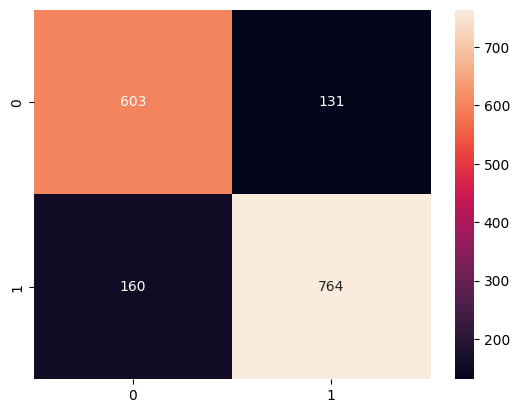

In [38]:
import seaborn as sns
# heatmap
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.0f')

In [39]:

import numpy as np

# 상위 단어 기여도 (log-odds)
vocab = np.array(cv.get_feature_names_out())
log_diff = model.feature_log_prob_[0] - model.feature_log_prob_[1]
top_idx = np.argsort(np.abs(log_diff))[-20:]



In [40]:
df_terms = pd.DataFrame({"term": vocab[top_idx], "log_odds_diff": log_diff[top_idx]}).sort_values("log_odds_diff", ascending=False)


In [41]:
# save
df_terms.to_csv("/content/top20_log_odds.csv", index=False)
print(" Saved: /content/top20_log_odds.csv")




 Saved: /content/top20_log_odds.csv


In [42]:
# download the file
from google.colab import files
files.download("/content/top20_log_odds.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>